In [35]:
#In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index. # Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

## Data Cleaning

### Whales Returns

In [3]:
# Reading whale returns

In [4]:
whaledf = pd.read_csv('whale_returns.csv')
whaledf

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [5]:
# Count nulls

In [6]:
whaledf.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
whaledf.columns

Index(['Date', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'],
      dtype='object')

In [8]:
whaledf[whaledf['SOROS FUND MANAGEMENT LLC'].isnull()]

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN


In [9]:
whaledf[whaledf['PAULSON & CO.INC. '].isnull()]

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN


In [10]:
whaledf[whaledf['TIGER GLOBAL MANAGEMENT LLC'].isnull()]

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN


In [11]:
whaledf[whaledf['BERKSHIRE HATHAWAY INC'].isnull()]

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN


In [12]:
# Drop nulls
whaledf.shape

(1060, 5)

In [13]:
whaledf.dropna(subset = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC'], inplace=True)
whaledf

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [14]:
whaledf['Close'] = whaledf['Close'].astype(float)


### Algorithmic Daily Returns


In [15]:
# Reading algorithmic returns

In [16]:
df = pd.read_csv('algo_returns.csv')
df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [17]:
# Count nulls

In [18]:
df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [19]:
df[df['Algo 2'].isnull()]

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
5,2014-06-04,-0.001838,NaN


In [20]:
# Drop nulls

In [21]:
df.shape

(1241, 3)

In [22]:
df.columns

Index(['Date', 'Algo 1', 'Algo 2'], dtype='object')

In [23]:
df.dropna(subset = ["Algo 2"], inplace=True)
df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [101]:
df['Algo 1'] = df['Algo 1'].astype(float)
df['Algo 2'] = df['Algo 2'].astype(float)
df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


### S&P TSX 60 Returns


In [24]:
# Reading S&P TSX 60 Closing Prices

In [25]:
spdf = pd.read_csv("sp_tsx_history.csv")
spdf.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [26]:
spdf.describe(include="all")

,Date,Close
count,1818,1818
unique,1818,1814
top,20-Jun-2014,"$14,533.57"
freq,1,2


In [27]:
spdf = spdf.set_index(pd.to_datetime(spdf["Date"], infer_datetime_format=True))
spdf.head()

,Date,Close
Date,,
2012-10-01,1-Oct-2012,"$12,370.19"
2012-10-02,2-Oct-2012,"$12,391.23"
2012-10-03,3-Oct-2012,"$12,359.47"
2012-10-04,4-Oct-2012,"$12,447.68"
2012-10-05,5-Oct-2012,"$12,418.99"


In [28]:
spdf = spdf.drop(columns=["Date"])
spdf.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [29]:
# Check Data Types

In [30]:
 # Retrieve DataFrame data types
spdf.dtypes

Close    object
dtype: object

In [31]:
spdf.count() 

Close    1818
dtype: int64

In [32]:
spdf["Close"].value_counts() 

$14,533.57    2
$16,074.30    2
$15,657.63    2
$16,371.55    2
$12,456.50    1
             ..
$15,838.24    1
$13,166.08    1
$15,607.88    1
$15,173.03    1
$16,250.75    1
Name: Close, Length: 1814, dtype: int64

In [33]:
spdf.isnull() 

,Close
Date,
2012-10-01,False
2012-10-02,False
2012-10-03,False
2012-10-04,False
2012-10-05,False
...,...
2019-12-20,False
2019-12-23,False
2019-12-24,False


In [34]:
spdf.isnull().mean() * 100 

Close    0.0
dtype: float64

In [35]:
spdf.isnull().sum() 

Close    0
dtype: int64

In [36]:
spdf.duplicated() 

Date
2012-10-01    False
2012-10-02    False
2012-10-03    False
2012-10-04    False
2012-10-05    False
              ...  
2019-12-20    False
2019-12-23    False
2019-12-24    False
2019-12-27    False
2019-12-30    False
Length: 1818, dtype: bool

In [37]:
# Fix Data Types

In [38]:
spdf.head() 

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [39]:
# Clean identified numeric fields with $ symbol
spdf["Close"] = spdf["Close"].str.replace("$", "")
spdf["Close"]

Date
2012-10-01    12,370.19
2012-10-02    12,391.23
2012-10-03    12,359.47
2012-10-04    12,447.68
2012-10-05    12,418.99
                ...    
2019-12-20    17,118.44
2019-12-23    17,128.71
2019-12-24    17,180.15
2019-12-27    17,168.21
2019-12-30    17,098.56
Name: Close, Length: 1818, dtype: object

In [40]:
spdf.dtypes 

Close    object
dtype: object

In [41]:
spdf["Close"] = spdf["Close"].str.replace(".", "")
spdf["Close"]

Date
2012-10-01    12,37019
2012-10-02    12,39123
2012-10-03    12,35947
2012-10-04    12,44768
2012-10-05    12,41899
                ...   
2019-12-20    17,11844
2019-12-23    17,12871
2019-12-24    17,18015
2019-12-27    17,16821
2019-12-30    17,09856
Name: Close, Length: 1818, dtype: object

In [42]:
spdf["Close"] = spdf["Close"].str.replace(",", "")
spdf["Close"]

Date
2012-10-01    1237019
2012-10-02    1239123
2012-10-03    1235947
2012-10-04    1244768
2012-10-05    1241899
               ...   
2019-12-20    1711844
2019-12-23    1712871
2019-12-24    1718015
2019-12-27    1716821
2019-12-30    1709856
Name: Close, Length: 1818, dtype: object

In [43]:
# Calculate Daily Returns

In [44]:
spdf['Close'] = spdf['Close'].astype(float)
spdf

,Close
Date,
2012-10-01,1237019.0
2012-10-02,1239123.0
2012-10-03,1235947.0
2012-10-04,1244768.0
2012-10-05,1241899.0
...,...
2019-12-20,1711844.0
2019-12-23,1712871.0
2019-12-24,1718015.0


In [45]:
daily_returns = spdf['Close'].sum()
daily_returns

2668497166.0

In [46]:
print(('{:,}').format(daily_returns))

2,668,497,166.0


In [47]:
# Drop nulls

In [48]:
spdf.isnull().sum()

Close    0
dtype: int64

In [49]:
# Rename `Close` Column to be specific to this portfolio.

In [50]:
spdf.columns 

Index(['Close'], dtype='object')

In [94]:
columns = ["S&P Daily Returns"] 
spdf.columns = columns 
spdf.head() 

,S&P Daily Returns
Date,
2012-10-01,1237019.0
2012-10-02,1239123.0
2012-10-03,1235947.0
2012-10-04,1244768.0
2012-10-05,1241899.0


In [95]:
newspdf = spdf
newspdf

,S&P Daily Returns
Date,
2012-10-01,1237019.0
2012-10-02,1239123.0
2012-10-03,1235947.0
2012-10-04,1244768.0
2012-10-05,1241899.0
...,...
2019-12-20,1711844.0
2019-12-23,1712871.0
2019-12-24,1718015.0


## Combine Whale, Algorithmic, and S&P TSX 60 Returns


In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
 

In [66]:
alldf = pd.concat([whaledf, df, spdf])
alldf

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,NaN,NaN,NaN
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213,NaN,NaN,NaN
3,2015-03-05,0.004016,0.004076,0.002355,0.006726,NaN,NaN,NaN
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,NaN,NaN,NaN
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-12-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1711844.0
2019-12-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1712871.0
2019-12-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718015.0
2019-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1716821.0


## Conduct Qualitative Analysis


### Performance Analysis

#### Calculate and Plot the daily returns.


In [ ]:
# Calculate cumulative returns of all portfolios

In [44]:
sum_alldf = alldf.sum()
sum_alldf

Date                           2015-03-022015-03-032015-03-042015-03-052015-0...
SOROS FUND MANAGEMENT LLC                                               0.189152
PAULSON & CO.INC.                                                      -0.215091
TIGER GLOBAL MANAGEMENT LLC                                           -0.0853932
BERKSHIRE HATHAWAY INC                                                   0.53037
Algo 1                                                                  0.827297
Algo 2                                                                  0.421061
dtype: object

<AxesSubplot:xlabel='Date'>

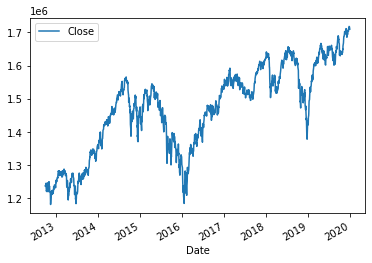

In [82]:
# Plot daily returns of all portfolios
spdf.plot()

<AxesSubplot:>

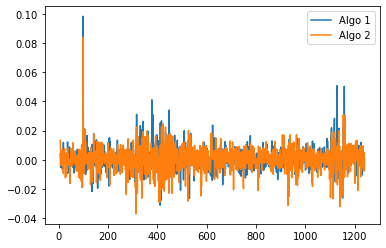

In [83]:
df.plot()

<AxesSubplot:>

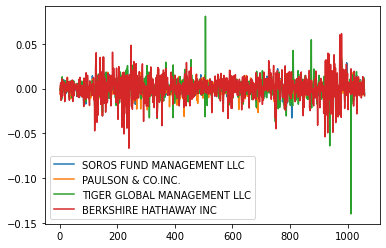

In [84]:
whaledf.plot()

<AxesSubplot:>

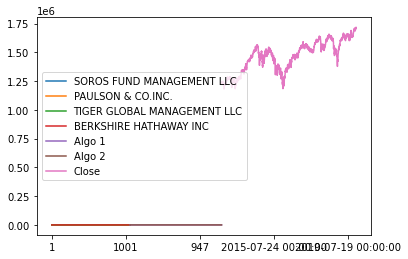

In [85]:
alldf.plot()

## Risk Analysis

In [ ]:
#Create a box plot for each portfolio. 

<AxesSubplot:>

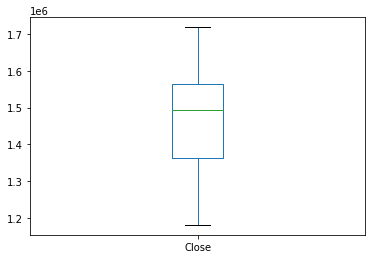

In [86]:
spdf.plot.box()

<AxesSubplot:>

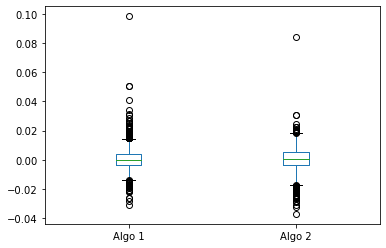

In [87]:
df.plot.box()

<AxesSubplot:>

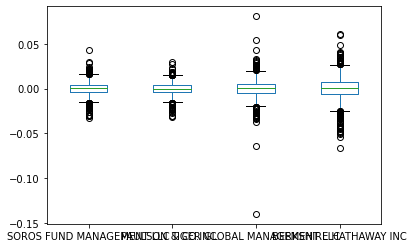

In [88]:
whaledf.plot.box()

<AxesSubplot:>

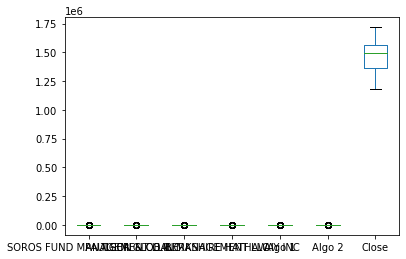

In [89]:
alldf.plot.box()

In [ ]:
# Calculate  the daily standard deviation for each portfolio

In [104]:
spdf * np.sqrt(252)

,S&P Daily Returns
Date,
2012-10-01,1.963707e+07
2012-10-02,1.967047e+07
2012-10-03,1.962005e+07
2012-10-04,1.976008e+07
2012-10-05,1.971454e+07
...,...
2019-12-20,2.717468e+07
2019-12-23,2.719098e+07
2019-12-24,2.727264e+07


In [ ]:
df * np.sqrt(252)

In [ ]:
whaledf * np.sqrt(252)

In [ ]:
alldf * np.sqrt(252)

## Rolling Statistics

In [1]:
#Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.

In [25]:
whaledf = pd.read_csv('whale_returns.csv')
df = pd.read_csv('algo_returns.csv')
spdf = pd.read_csv("sp_tsx_history.csv")
alldf = pd.concat([whaledf, df, spdf])
alldf
plot_alldf = alldf.rolling(21).std()

<AxesSubplot:>

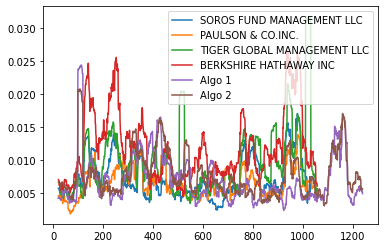

In [26]:
plot_alldf.plot()

In [27]:
#Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60

In [29]:
plot_whaledf = whaledf.rolling(60).std()

<AxesSubplot:>

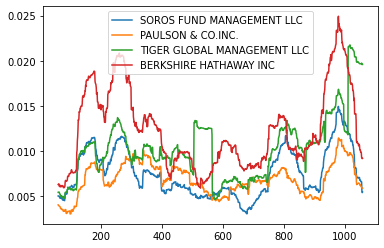

In [30]:
plot_whaledf.plot()

In [34]:
plot_spdf = spdf.rolling(60).std
plot_spdf.plot()

In [49]:
sharpe_ratios = ((alldf.mean()-alldf.mean()) * 252) / (alldf.std())
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')